# Part 1: Simulating the robot

In [1]:
import numpy as np
import random as rand
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
from scipy.stats import norm
import seaborn as sns
import pandas as pd

def func(U,x):
    #-2x+2U
    val = -(2*x) + 2*U
    return val
def simulation(x,t,h):
    save = 0
    U_save = []
    t_save = []
    x_save = []
    x_exact_save = []

    U_array = []
    t_array = []
    x_array = []
    x_exact_array = []
    while(t <= 15):
        if(t <= 5):
            U = 2
        elif(t < 5 or t <= 10):
            U = 1
        elif(t < 10 or t <=15):
            U = 3
        #print("U value:", x)
        U_array.append(U)
        k = h * func(U,x)
        x = x + k
        t = t + h
        #value under graph
        x_exact = U - math.exp(-2*t)
        t_array.append(t)
        x_array.append(x)
        x_exact_array.append(x_exact)
        save+=1
        #save every 10th integral if h<=0.01
        if(save%10 == 0):
            U_save.append(U)
            t_save.append(t)
            x_save.append(x)
            x_exact_save.append(x_exact)
            #print("save1: ",save)
        #print("Where it is: ",x,"Exact pos= ",x_exact,"Time: ",t)
    return U_save,t_save,x_save,x_exact_save,U_array,t_array,x_array,x_exact_array 

The following step sizes were provided to measure against: 0.75, .5, 0.25, 0.01, 0.001


## Step size 0.001

In [2]:
U_save1 = []
t_save1 = []
x_save1 = []
x_exact_save1 = []


##saves every time
U_array1 = []
t_array1 = []
x_array1 = []
x_exact_array1 = []

#step size 
U_save1,t_save1,x_save1,x_exact_save1,U_array1,t_array1,x_array1,x_exact_array1=simulation(0,0,0.001)

#0.35 for bell curve

## Step size 0.01

In [3]:
U_save2 = []
t_save2 = []
x_save2 = []
x_exact_save2 = []


##saves every time
U_array2 = []
t_array2 = []
x_array2 = []
x_exact_array2 = []

#step size 
U_save2,t_save2,x_save2,x_exact_save2,U_array2,t_array2,x_array2,x_exact_array2=simulation(0,0,0.01)

#0.35 for bell curve

## Step size 0.25

In [4]:
U_save3 = []
t_save3 = []
x_save3 = []
x_exact_save3 = []


##saves every time
U_array3 = []
t_array3 = []
x_array3 = []
x_exact_array3 = []

#step size 
U_save3,t_save3,x_save3,x_exact_save3,U_array3,t_array3,x_array3,x_exact_array3=simulation(0,0,0.25)

## Step size 0.5

In [5]:
U_save4 = []
t_save4 = []
x_save4 = []
x_exact_save4 = []


##saves every time
U_array4 = []
t_array4 = []
x_array4 = []
x_exact_array4 = []

#step size 
U_save4,t_save4,x_save4,x_exact_save4,U_array4,t_array4,x_array4,x_exact_array4=simulation(0,0,0.5)

## Step size 0.75

In [6]:
U_save5 = []
t_save5 = []
x_save5 = []
x_exact_save5 = []


##saves every time
U_array5 = []
t_array5 = []
x_array5 = []
x_exact_array5 = []

#step size 
U_save5,t_save5,x_save5,x_exact_save5,U_array5,t_array5,x_array5,x_exact_array5=simulation(0,0,0.75)

## Saving values into a dataframe and plotting it 

In [7]:
data1 = {'X':x_array1,'T':t_array1}
df1 = pd.DataFrame(data1)
data2 = {'X':x_array2,'T':t_array2}
df2= pd.DataFrame(data2)
data3 = {'X':x_array3,'T':t_array3}
df3= pd.DataFrame(data3)
data4= {'X':x_array4,'T':t_array4}
df4= pd.DataFrame(data4)
data5= {'X':x_array5,'T':t_array5}
df5= pd.DataFrame(data5)

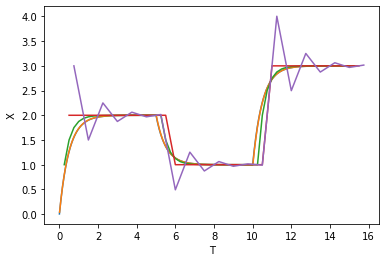

In [8]:
plt3 = sns.lineplot(x="T", y="X", data=df1) #blue
plt4 = sns.lineplot(x="T", y="X", data=df2) #Orange
plt5 = sns.lineplot(x="T", y="X", data=df3) #Green
plt6 = sns.lineplot(x="T", y="X", data=df4) #Red
plt7 = sns.lineplot(x="T", y="X", data=df5) #Purple

## Error evaluation against step size

# Part 2: Random Noise using Box Muller Method

## Initialise/Compute standard deviation and mean

In [9]:
import statistics as stat
std_dev1 = stat.stdev(x_array1)   #calculate standard deviation of input array
_mean1 = stat.mean(x_array1)      #calculate mean of input array

std_dev = 0.0431                  #set custom standard deviation
_mean = 0.5                       #set custom mean
print("deviation: ",std_dev,"mean: ",_mean,"DEVIATION: ",std_dev1,"MEAN: ",_mean1)

deviation:  0.0431 mean:  0.5 DEVIATION:  0.7789244866974134 MEAN:  1.900142980914039


## compute box muller algorithm

In [27]:
def box_muller(array,standard_deviation,mean):
    random_vls = []
    i = 0
    it = 0
    box_1 = []
    box_2 = []
    while i < len(array):
        if(it == 0):
            z1 =  rand.uniform(0,2*np.pi)
            b  =  standard_deviation*np.sqrt(-2*math.log(rand.uniform(0,1)))
            z2 =  b*(math.sin(z1))+mean
            z3 =  b*(math.cos(z1))+mean
            box_1.append(z2)
            noise = array[i] + z2
            random_vls.append(noise)
            it = 1
            i = i + 1
        else:
            it = 0
            box_2.append(z3)
            noise = array[i] + z3
            random_vls.append(noise)
            i= i + 1
    return random_vls,box_1,box_2

In [28]:
random_vals = []
random_vals,b1,b2 = box_muller(x_save2,std_dev,_mean)

## Noise plot

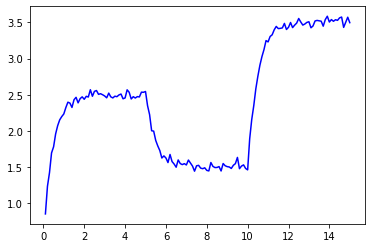

In [29]:
y = random_vals
x = t_save2
plt.plot(x,y,"b") #actual
plt.show()

## Proof that numbers generated fall within a gaussian distribution

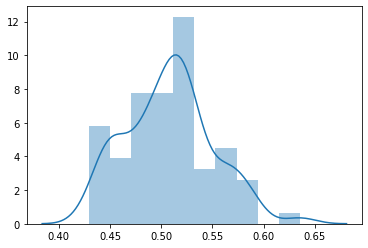

In [30]:
sns.distplot(b1)

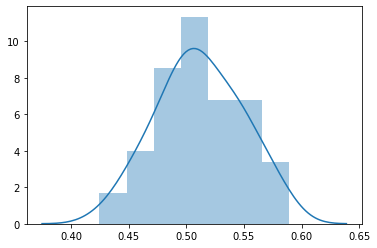

In [31]:
sns.distplot(b2)

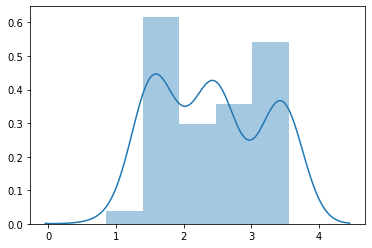

In [13]:
sns.distplot(random_vals)

# Part 3: Adding an intelligent agent to track the noise

## Sigmoid Activation

In [32]:
def sigmoid_activation(val):
  sigmoid = 1/1+np.exp(-val)#sigmoid activation function
  return sigmoid

def train_weights3(array, lr, loops):
    weights3 = [1,rand.uniform(0,1),rand.uniform(0,1),rand.uniform(0,1)]#weights initialisation
    itr = 0                 #used to switch between creation of a new weights array and updating created weights
    weights3_1 = []         #save weights
    itr_array = []          #saves number of epochs done
    sum_error_array = []    #saves sum_error generated per epoch
    for loop in range(loops):
        net_array = []                      #saves network predictions
        error_array = []                    #saves error
        sum_error = 0.0                     #a variable that keeps track of error generated
        c = 0                               #counter for initialising
        w_adaptor = 0                       #used to iterate through saved weights in order to update them
        if itr < 1:
            for a in array:                 #for each input in input array
                weights3_1.append([weights3[0],weights3[1],weights3[2],weights3[3]])  #append new weights to empty weight array
                prediction, netwrk_sum = predict3(a,weights3)                         #predict function for sigmoid network
                if c == 0:
                    Target = a[2]
                    #print(1)
                elif c==1:
                    Target = a[1]
                else:
                    Target = a[0]
                delta = Target - prediction  #calculate error of the prediction
                error = delta
                error_array.append(error)    #save error
                net_array.append(prediction) #save network
                #------------------------WEIGHTS UPDATED BY CORRESPONDING CURRENT ERROR AND INPUT----------------------------------
                weights3_change_bias = -a[0] *lr*(error)         #calculate weight change for bias
                weights3[0] = weights3[0] + weights3_change_bias #add weight change calculated to current bias
                weights3_change= -a[0]*(error)*lr                #calculate weight change for input weights
                for i in range(len(a)):                          #iterate over every input weight
                    weights3[i + 1] = weights3[i +1] + weights3_change     #update each input weight
                sum_error += error**2                            #calculate sum error
                c = c + 1                                        #increase counter
            print('>epoch=%d, lrate=%.3f, error=%.3f, , sum_error=%.3f' % (loop, lr, error, sum_error))
            sum_error_array.append(sum_error)                    #append sum_error
            itr_array.append(itr)                                #append iteration
            itr+=1                                               #increment itr so that it can switch to the else function
        else:
            for a in array:
                prediction, netwrk_sum = predict3(a,weights3_1[w_adaptor]) #calculate prediction based on created weights
                if c == 0:
                    Target = a[2]
                    #print(1)
                elif c==1:
                    Target = a[1]
                else:
                    Target = a[0]
                delta = Target - prediction  #calculate error change
                error = delta                
                error_array.append(error)    #append error
                net_array.append(prediction) #append network prediction 
                #------------------------WEIGHTS UPDATED BY CORRESPONDING CURRENT ERROR AND INPUT----------------------------------
                weights3_change_bias = -a[0] *lr*(error) #calculate weight change for bias
                weights3_1[w_adaptor][0] = weights3_1[w_adaptor][0] + weights3_change_bias #add weight change to current bias
                weights3_change= -a[0]*(error)*lr  #calculate weight change
                for i in range(len(a)):            #iterate through each input
                     weights3_1[w_adaptor][i + 1] =  weights3_1[w_adaptor][i +1] + weights3_change #for each input weight add weight change
                sum_error += error**2      #calculate error squared
                c = c + 1                  #increment counter
                w_adaptor = w_adaptor + 1  #increment weight adaptor
            print('>epoch=%d, lrate=%.3f, error=%.3f, , sum_error=%.3f' % (loop, lr, error, sum_error))
            sum_error_array.append(sum_error) #append error
            itr_array.append(itr)             #append iteration
            itr+=1                            #increase iteration counter
    return net_array,error_array,weights3_1,sum_error_array,itr_array
            
def predict3(noise2,weights2):
    net_sum = 0
    net_sum = weights2[0] #obtain bias from weight array
    for i in range(len(noise2)-1):
        net_sum += weights2[i + 1] * noise2[i] #multiply input by respective weight to obtain a summation
    activation2 = sigmoid_activation(net_sum)  #implement sigmoid function to summation obtained
    return activation2, net_sum                #return activation and network sum

def triple_converter(array):                   #converts input into a tuple so that we can pass 3 input weights per prediction
    triple_array = []
    c = 0                                      #counter
    while c < len(array):
        if c == 0:
            triple_array.append([0,0,array[c]])
        elif c == 1:
            triple_array.append([0,array[c],array[c-1]])
        else:
            triple_array.append([array[c],array[c-1],array[c-2]])
        c = c + 1                              #increment counter
    return triple_array

## Step function activation

In [33]:
##--------------------------------SINGLE PERCEPTRON-----------------------------------------------##
def predict_step(noise1,weights1):
    net_sum = 0
    out = 0
    net_sum = weights1[0]
    for i in range(len(noise1)-1):
        net_sum += weights1[i + 1] * noise1[i]
    #print("netsum: ",net_sum)
    if net_sum > 1:
        out = 1
    else:
        out = 0
    return out

def train_weights_step(array, lr, loops):
    weights3 = [1,rand.uniform(0,1),rand.uniform(0,1),rand.uniform(0,1)]
    itr = 0
    weights3_1 = []
    for loop in range(loops):
        net_array = []
        error_array = []
        sum_error = 0.0
        c = 0
        w_adaptor = 0
        if itr < 1:
            for a in array:
                weights3_1.append([weights3[0],weights3[1],weights3[2],weights3[3]])
                prediction = predict_step(a,weights3)
                if c == 0:
                    Target = a[2]
                    #print(1)
                elif c==1:
                    Target = a[1]
                else:
                    Target = a[0]
                delta = Target - prediction
                error = delta
                error_array.append(error)
                net_array.append(prediction)
                #------------------------WEIGHTS UPDATED BY CORRESPONDING CURRENT ERROR AND INPUT----------------------------------
                weights3_change_bias = -a[0]*lr*error 
                weights3[0] = weights3[0] + weights3_change_bias
                weights3_change= -a[0]*lr*error
                for i in range(len(a)):
                    weights3[i + 1] = weights3[i +1] + weights3_change
                sum_error += error**2
                c = c + 1
            print('>epoch=%d, lrate=%.3f, error=%.3f, , sum_error=%.3f' % (loop, lr, error, sum_error))
            itr+=1
        else:
            for a in array:
                prediction = predict_step(a,weights3_1[w_adaptor])
                if c == 0:
                    Target = a[2]
                elif c==1:
                    Target = a[1]
                else:
                    Target = a[0]
                delta = prediction - Target
                error = delta
                error_array.append(error)
                net_array.append(prediction)
                #------------------------WEIGHTS UPDATED BY CORRESPONDING CURRENT ERROR AND INPUT----------------------------------
            
                weights3_change_bias = -a[0] *lr*(error) 
                weights3_1[w_adaptor][0] = weights3_1[w_adaptor][0] + weights3_change_bias
                weights3_change= -a[0]*(error)*lr
                for i in range(len(a)):
                     weights3_1[w_adaptor][i + 1] =  weights3_1[w_adaptor][i +1] + weights3_change
                sum_error += error**2
                c = c + 1
                w_adaptor = w_adaptor + 1
            print('>epoch=%d, lrate=%.3f, error=%.3f, , sum_error=%.3f' % (loop, lr, error, sum_error))
            itr+=1
    return net_array,error_array,weights3_1

# Implement weights(sigmoid)

In [34]:
def sigmoid_activation(val):
  sigmoid = 1/1+np.exp(-val)
  return sigmoid

def implement_weights3(array,loops,weights):
    itr = 0
    itr_array = []
    sum_error_array = []
    for loop in range(loops):
        net_array = []
        error_array = []
        sum_error = 0.0
        c = 0
        w_adaptor = 0
        for a in array:
            prediction, netwrk_sum = predict3(a,weights[w_adaptor])
            net_array.append(prediction)
            Target = a[0]
            error = Target - prediction
            sum_error += error**2
            c = c + 1
            w_adaptor = w_adaptor + 1
        print('>epoch=%d, error=%.3f, , sum_error=%.3f' % (loop, error, sum_error))
        sum_error_array.append(sum_error)
        itr_array.append(itr)
        itr+=1
    return net_array,sum_error_array,itr_array
            
def predict3(noise2,weights2):
    net_sum = 0
    net_sum = weights2[0]
    for i in range(len(noise2)-1):
        net_sum += weights2[i + 1] * noise2[i]
    activation2 = sigmoid_activation(net_sum)
    return activation2, net_sum
#x_save2

## Train network using sigmoid

In [36]:
dat1 = triple_converter(random_vals)
values,e,w,test,itrArray = train_weights3(dat1, 0.01,100)
#0.006531

#save to dataframe
data6= {'Noise_values':dat1,'Trained':values,'Error':e,'T':t_save2}
df6= pd.DataFrame(data6)

>epoch=0, lrate=0.010, error=-0.094, , sum_error=50.602
>epoch=1, lrate=0.010, error=-0.094, , sum_error=50.602
>epoch=2, lrate=0.010, error=-0.026, , sum_error=45.836
>epoch=3, lrate=0.010, error=-0.008, , sum_error=41.933
>epoch=4, lrate=0.010, error=-0.002, , sum_error=38.578
>epoch=5, lrate=0.010, error=-0.001, , sum_error=35.599
>epoch=6, lrate=0.010, error=-0.000, , sum_error=32.889
>epoch=7, lrate=0.010, error=-0.000, , sum_error=30.385
>epoch=8, lrate=0.010, error=-0.000, , sum_error=28.048
>epoch=9, lrate=0.010, error=-0.000, , sum_error=25.857
>epoch=10, lrate=0.010, error=-0.000, , sum_error=23.796
>epoch=11, lrate=0.010, error=-0.000, , sum_error=21.858
>epoch=12, lrate=0.010, error=-0.000, , sum_error=20.034
>epoch=13, lrate=0.010, error=-0.000, , sum_error=18.320
>epoch=14, lrate=0.010, error=-0.000, , sum_error=16.714
>epoch=15, lrate=0.010, error=-0.000, , sum_error=15.212
>epoch=16, lrate=0.010, error=-0.000, , sum_error=13.814
>epoch=17, lrate=0.010, error=-0.000, , s

### Implementation during training

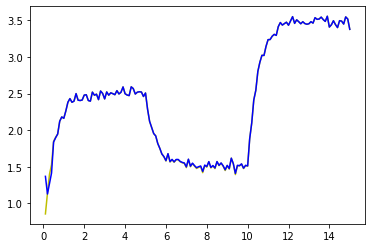

In [18]:
y_axis = values #network output
y = random_vals
x_axis = x = t_save2
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

### Weights implementation on unseen data

In [19]:
dat1 = triple_converter(x_save2)
net_array,sum_error_array,itr_array = implement_weights3(dat1, 5,w)
#0.006531

#save to dataframe
#data6= {'Noise_values':dat1,'Trained':values,'Error':e,'T':t_save2}
#df6= pd.DataFrame(data6)

>epoch=0, error=-0.148, , sum_error=23.804
>epoch=1, error=-0.148, , sum_error=23.804
>epoch=2, error=-0.148, , sum_error=23.804
>epoch=3, error=-0.148, , sum_error=23.804
>epoch=4, error=-0.148, , sum_error=23.804


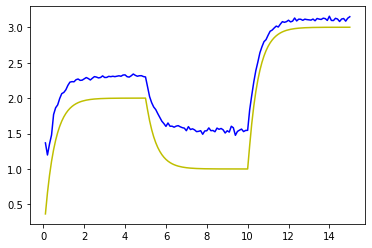

In [20]:
y_axis = net_array #network output
y = x_save2
x_axis = x = t_save2
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

### Error plot per iteration

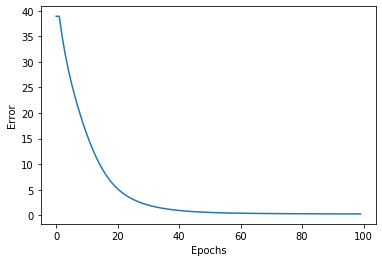

In [21]:
error_dataframe = {'Error':test,'Epochs':itrArray}
error_df = pd.DataFrame(error_dataframe)
error_plt = sns.lineplot(x="Epochs", y="Error", data=error_df) #blue

In [22]:
df6

,Noise_values,Trained,Error,T
0,"[0, 0, 0.8546083119304264]",1.367879,-0.513271,0.1
1,"[0, 1.137610571068201, 0.8546083119304264]",1.126687,0.010924,0.2
2,"[1.39793026235662, 1.137610571068201, 0.854608...",1.270249,0.127681,0.3
3,"[1.528207055406994, 1.39793026235662, 1.137610...",1.413531,0.114676,0.4
4,"[1.8471919960937002, 1.528207055406994, 1.3979...",1.835936,0.011256,0.5
...,...,...,...,...
145,"[3.489596897259936, 3.495350083758322, 3.40147...",3.489597,0.000000,14.6
146,"[3.449649983729124, 3.489596897259936, 3.49535...",3.449650,0.000000,14.7
147,"[3.5472167786757307, 3.449649983729124, 3.4895...",3.547217,0.000000,14.8
148,"[3.5178219975916725, 3.5472167786757307, 3.449...",3.517822,0.000000,14.9


## Network prediction(blue) against noise values(yellow)

## Train network using step function

In [23]:
values1,x,y = train_weights_step(dat1, 0.01,50)

>epoch=0, lrate=0.010, error=3.000, , sum_error=579.666
>epoch=1, lrate=0.010, error=-3.000, , sum_error=579.666
>epoch=2, lrate=0.010, error=-3.000, , sum_error=576.687
>epoch=3, lrate=0.010, error=-3.000, , sum_error=573.704
>epoch=4, lrate=0.010, error=-3.000, , sum_error=570.718
>epoch=5, lrate=0.010, error=-3.000, , sum_error=567.730
>epoch=6, lrate=0.010, error=-3.000, , sum_error=564.739
>epoch=7, lrate=0.010, error=-3.000, , sum_error=561.747
>epoch=8, lrate=0.010, error=-3.000, , sum_error=558.753
>epoch=9, lrate=0.010, error=-3.000, , sum_error=555.758
>epoch=10, lrate=0.010, error=-3.000, , sum_error=552.762
>epoch=11, lrate=0.010, error=-3.000, , sum_error=549.765
>epoch=12, lrate=0.010, error=-3.000, , sum_error=546.768
>epoch=13, lrate=0.010, error=-3.000, , sum_error=543.770
>epoch=14, lrate=0.010, error=-3.000, , sum_error=540.772
>epoch=15, lrate=0.010, error=-3.000, , sum_error=537.774
>epoch=16, lrate=0.010, error=-3.000, , sum_error=534.775
>epoch=17, lrate=0.010, e

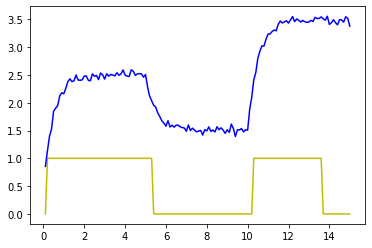

In [24]:

y_axis = random_vals #network output
y = values1
x_axis = x = t_save2
plt.plot(x,y,"y") #robot
plt.plot(x_axis,y_axis,"b")#tracker
plt.show()


## Perceptron values against different noise samples(Sigmoid)

### Adding noise to other step sizes using box muller

#### Example 1(step size =0.1)

In [25]:
random_vals1 = []
random_vals1 = box_muller(x_save1,std_dev,_mean)
random_vals_t1 = []
random_vals_t1 = triple_converter(random_vals1)

#values,e = train_weights3(dat1, 0.01,1)
#0.006531
values1,e1,w = train_weights3(random_vals_t1, 0.01,40)

>epoch=0, lrate=0.010, error=-0.071, , sum_error=35.496
>epoch=1, lrate=0.010, error=-0.071, , sum_error=35.496
>epoch=2, lrate=0.010, error=-0.023, , sum_error=30.650
>epoch=3, lrate=0.010, error=-0.008, , sum_error=28.355
>epoch=4, lrate=0.010, error=-0.003, , sum_error=26.579
>epoch=5, lrate=0.010, error=-0.001, , sum_error=25.038
>epoch=6, lrate=0.010, error=-0.000, , sum_error=23.660
>epoch=7, lrate=0.010, error=-0.000, , sum_error=22.409
>epoch=8, lrate=0.010, error=-0.000, , sum_error=21.263
>epoch=9, lrate=0.010, error=-0.000, , sum_error=20.206
>epoch=10, lrate=0.010, error=-0.000, , sum_error=19.226
>epoch=11, lrate=0.010, error=-0.000, , sum_error=18.315
>epoch=12, lrate=0.010, error=-0.000, , sum_error=17.463
>epoch=13, lrate=0.010, error=-0.000, , sum_error=16.667
>epoch=14, lrate=0.010, error=-0.000, , sum_error=15.920
>epoch=15, lrate=0.010, error=-0.000, , sum_error=15.219
>epoch=16, lrate=0.010, error=-0.000, , sum_error=14.559
>epoch=17, lrate=0.010, error=-0.000, , s

ValueError: too many values to unpack (expected 3)

In [ ]:
y_axis = values1 #network output
y = random_vals1
x_axis = x = t_save1
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

## Error representation 

In [ ]:
e_array = e1
c = 0
while c < len(e_array):
    e_array[c] = abs(e_array[c])
    c=c+1
    
y_axis = e_array #network output
#y = x_array2
x_axis = x = t_save1
#plt.plot(x,y,"y") #x_noise values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()

In [ ]:
len(e1)

In [ ]:
data7= {'Noise_values':random_vals_t1,'Network_output':values1,'Error':e1,'T':t_save1}
vis= pd.DataFrame(data7)
vis

#### Example 2(step size = 0.01)

In [ ]:
random_vals2 = []
random_vals2 = box_muller(x_save2,std_dev,_mean)
random_vals_t2 =[]
random_vals_t2 = triple_converter(random_vals2)
values2,e2,w =train_weights3(random_vals_t2,0.01,20)

In [ ]:
y_axis = values2 #network output
y = random_vals2 # x noise
x_axis = x = t_save2
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

## Error representation

In [ ]:
e_array = e2
c = 0
while c < len(e_array):
    e_array[c] = abs(e_array[c])
    c=c+1
    
y_axis = e_array #network output
#y = x_array2
x_axis = x = t_save2
#plt.plot(x,y,"y") #x_noise values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()

In [ ]:
len(values2)

In [ ]:
data8= {'Noise_values':random_vals_t2,'Network_output':values2,'Error':e2,'T':t_save2}
vis1= pd.DataFrame(data8)
vis1

#### Example 3(step size = 0.5)

In [ ]:
random_vals3 = []
random_vals3 = box_muller(x_array4,std_dev,_mean)
random_vals_t3 = []
random_vals_t3 = triple_converter(random_vals3)
values3,e3,w = train_weights3(random_vals_t3, 0.011,100)

In [ ]:
y_axis = values3 #network output
y = random_vals3 # x noise
x_axis = x = t_array4
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

## Error representation

In [ ]:
e_array = e3
c = 0
while c < len(e_array):
    e_array[c] = abs(e_array[c])
    c=c+1
    
y_axis = e_array #network output
#y = x_array2
x_axis = x = t_array4
#plt.plot(x,y,"y") #x_noise values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()

In [ ]:
data9= {'Noise_values':random_vals_t3,'Network_output':values3,'Error':e3,'T':t_array4}
vis2= pd.DataFrame(data9)
vis2

#### Example 4(step size = 0.75)

In [ ]:
random_vals4 = []
random_vals4 = box_muller(x_array5,std_dev,_mean)
random_vals_t4 = triple_converter(random_vals4)
values4,e4,w = train_weights3(random_vals_t4, 0.01,15)

In [ ]:
y_axis = values4 #network output
y = random_vals4 # x noise
x_axis = x = t_array5
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

## Error representation

In [ ]:
e_array = e4
c = 0
while c < len(e_array):
    e_array[c] = abs(e_array[c])
    c=c+1
    
y_axis = e_array #network output
#y = x_array2
x_axis = x = t_array5
#plt.plot(x,y,"y") #x_noise values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()

In [ ]:
#itr,input,output,error
data_10= {'Noise_values':random_vals_t4,'Network_output':values4,'Error':e4,'T':t_array5}
vis3= pd.DataFrame(data_10)
vis3

# Perceptron model with different learning rates

## Example 1

In [ ]:
random_vals1 = []
random_vals1 = box_muller(x_save2,std_dev,_mean)
values1,e1 = train_weights(random_vals1, 0.006531,5)

In [ ]:
y_axis = values1 #network output
y = random_vals1
x_axis = x = t_save2
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

In [ ]:
y_axis = values2 #network output
y = random_vals2 # x noise
x_axis = x = t_save2
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

## Example 2

In [ ]:
random_vals1 = []
random_vals1 = box_muller(x_array2,std_dev,_mean)
values1,e1 = train_weights(random_vals1, 0.06531,5)

In [ ]:
y_axis = values1 #network output
y = random_vals1
x_axis = x = t_array2
plt.plot(x,y,"y") #x_noise values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()

## Example 3

In [ ]:
random_vals8 = []
random_vals8 = box_muller(x_array2,std_dev,_mean)
values8,e8 = train_weights(random_vals8, 0.6531,5)

In [ ]:
y_axis = values8 #network output
y = random_vals8
x_axis = x = t_array2
plt.plot(x,y,"y") #x_noise values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()

In [ ]:
data_11= {'Noise_values':random_vals8,'Network_output':values8,'Error':e8,'T':t_array2}
vis8= pd.DataFrame(data_11)
vis8

In [ ]:
#df.to_csv(r'Path where you want to store the exported CSV file\File Name.csv', index = False)

In [ ]:
random_vals3 = []
random_vals3 = box_muller(x_array4,std_dev,_mean)
random_vals_t3 = []
random_vals_t3 = triple_converter(x_array2)
values3,e3,w = train_weights3(random_vals_t3, 0.011,100)

In [ ]:
y_axis = values3 #network output
y = x_array2
x_axis = x = t_array2
plt.plot(x,y,"y") #u_values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()

In [ ]:
w

In [ ]:
random_vals3 = []
random_vals3 = box_muller(x_array4,std_dev,_mean)
random_vals_t3 = []
random_vals_t3 = triple_converter(x_array2)
values3,e3 = train_weights(x_array2, 0.011,5)

In [ ]:
y_axis = values3 #network output
y = x_array2
x_axis = x = t_array2
plt.plot(x,y,"y") #x_noise values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()

In [ ]:
len(values3)

In [ ]:
e_array = e3
c = 0
while c < len(e_array):
    e_array[c] = abs(e_array[c])
    c=c+1
    
y_axis = e_array #network output
#y = x_array2
x_axis = x = t_array2
#plt.plot(x,y,"y") #x_noise values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()

In [ ]:
y_axis = e_array #network output
#y = x_array2
x_axis = x = t_array2
#plt.plot(x,y,"y") #x_noise values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()